<a href="https://colab.research.google.com/github/GUC-DM/w23-mini-project-2-mariam-haggagt02-reem-khaledt02/blob/main/Copy_of_Classification_Mini_Projectt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Mariem Haggag

ID: 52-11236

Tutorial: T-02

---

Name: Reem Khaled

ID: 52-2002

Tutorial:T-02

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')

df.head()

<ipython-input-286-42697d995335>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [287]:
df.info() # gets all the information about the dataset( the no of columns, the name of the columns, the amount of non null rows and the data type of each column) useful to explore the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [288]:
pd.set_option("display.float_format", "{:.2f}".format) # this controls the display of float number to be displayed with two deimal figures after as to normaliza the data and then the df. describe gets the
df.describe()# this provides important information about the numerical columns in the data set ( information such as count, mean, standard deviation ,minimum, maximum and the quartiles)

,SeniorCitizen,tenure
count,7032.00,7032.00
mean,0.16,32.42
std,0.37,24.55
min,0.00,1.00
25%,0.00,9.00
50%,0.00,29.00
75%,0.00,55.00
max,1.00,72.00


In [289]:
df.isnull().sum()# provides the sum of null values in each column

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [290]:
for column in df.columns: #prints the unique values in each column and ignores redundancy
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [291]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}") # prints the number of unique values in each column so that if a column consists of only unique values then we should drop it (as it doesn't affect the dataset or the relationship)
    print("==========================================================") # based on this we know we will drop customer id as it all consists of unique values and does not add value to the data and we did not drop any other columns as they do not have a single value and no just unique values columns

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


## Data Cleaning

In [292]:
df.drop(['customerID'], axis="columns", inplace=True) # we dropped customer id as it solely consists of unique values as they do not add value to the data

In [293]:
print(df.columns) # we wanted to make sure that the column was dropped so we printed all the columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [294]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '') # MonthlyCharges is an integer that was inserted in the form of an object so we wanted to remove the /m before we can change it into an int( its correct form)

In [295]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').astype(float) # MonthlyCharges is an integer that was inserted in the form of an object so we wanted to remove the $ before we can change it into an int( its correct form)

<ipython-input-295-8dcee3dec220>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').astype(float) # MonthlyCharges is an integer that was inserted in the form of an object so we wanted to remove the $ before we can change it into an int( its correct form)


In [296]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [297]:
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '').astype(float) #Total charges is an integer that was inserted as an object so we wanted to remove the dollar sign and change it into a float number. we changed it into float as to not approximate it if we just use int and change the data

<ipython-input-297-336b38ae49a5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TotalCharges'] = df['TotalCharges'].str.replace('$', '').astype(float) #Total charges is an integer that was inserted as an object so we wanted to remove the dollar sign and change it into a float number. we changed it into float as to not approximate it if we just use int and change the data


In [298]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure']) #we discovered that the total charges is equal to the monthly charges multiplied by the subscription tenure and we wanted to be as accurate as possible so we avoided filling the null values with the mean as it is a numerical column and instead used this equation to properly estimate the total charges and be more accurate

This code fills missing values in the "TotalCharges" column with the product of "MonthlyCharges" and "tenure" columns. It addresses null values by estimating the total charges for each customer based on their monthly charge and subscription tenure.

In [299]:
df['TotalCharges'].isnull().sum() # gets null value  making sure that the null vlues are replaced and no null values left

0

In [300]:
categorical_col = []
for column in df.columns: # we wanted to make a list to put the categorical columnns in as to be used later in the visualization and to have a list of categorical columns instead of looping on the whole dataset each and every time as this would be inefficient
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [301]:
df['Contract'] = pd.Categorical(df['Contract'], # contract is an ordinal categorical attribute so we had to specify it so that we can compare using < and> if needed, however our main aim of this was to specify that this is categorigal ordinal column
                                      categories=['Month-to-month' , 'One year', 'Two year'],
                                      ordered=True)
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [302]:
df['Contract'].unique() #checking that it is detected that the contract is an ordinal column

['Month-to-month', 'One year', 'Two year']
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [303]:
df['Churn'] = df['Churn'].astype('category').cat.codes #we will encode the Churn into its numerical equivelant so that we can use it in correlation matrix and plots and in visualizationn
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [304]:
df1= df.copy()

In [305]:
df1['gender'] = df1['gender'].astype('category').cat.codes
df1['gender'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       1
2       1
3       1
4       0
       ..
7027    1
7028    0
7029    0
7030    1
7031    1
Name: gender, Length: 7032, dtype: int8

In [306]:
df1['Partner'] = df1['Partner'].astype('category').cat.codes
df1['Partner'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       1
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    1
7030    1
7031    0
Name: Partner, Length: 7032, dtype: int8

In [307]:
df1['Dependents'] = df1['Dependents'].astype('category').cat.codes
df1['Dependents'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    1
7030    0
7031    0
Name: Dependents, Length: 7032, dtype: int8

In [308]:
df1['PhoneService'] = df1['PhoneService'].astype('category').cat.codes
df1['PhoneService'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       1
2       1
3       0
4       1
       ..
7027    1
7028    1
7029    0
7030    1
7031    1
Name: PhoneService, Length: 7032, dtype: int8

In [309]:
df1['MultipleLines'] = df1['MultipleLines'].astype('category').cat.codes
df1['MultipleLines'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       1
1       0
2       0
3       1
4       0
       ..
7027    2
7028    2
7029    1
7030    2
7031    0
Name: MultipleLines, Length: 7032, dtype: int8

In [310]:
df1['InternetService'] = df1['InternetService'].astype('category').cat.codes
df1['InternetService'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       0
2       0
3       0
4       1
       ..
7027    0
7028    1
7029    0
7030    1
7031    1
Name: InternetService, Length: 7032, dtype: int8

In [311]:
df1['OnlineSecurity'] = df1['OnlineSecurity'].astype('category').cat.codes
df1['OnlineSecurity'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       2
2       2
3       2
4       0
       ..
7027    2
7028    0
7029    2
7030    0
7031    2
Name: OnlineSecurity, Length: 7032, dtype: int8

In [312]:
df1['OnlineBackup'] = df1['OnlineBackup'].astype('category').cat.codes
df1['OnlineBackup'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       2
1       0
2       2
3       0
4       0
       ..
7027    0
7028    2
7029    0
7030    0
7031    0
Name: OnlineBackup, Length: 7032, dtype: int8

In [313]:
df1['DeviceProtection'] = df1['DeviceProtection'].astype('category').cat.codes
df1['DeviceProtection'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       2
2       0
3       2
4       0
       ..
7027    2
7028    2
7029    0
7030    0
7031    2
Name: DeviceProtection, Length: 7032, dtype: int8

In [314]:
df1['TechSupport'] = df1['TechSupport'].astype('category').cat.codes
df1['TechSupport'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       0
2       0
3       2
4       0
       ..
7027    2
7028    0
7029    0
7030    0
7031    2
Name: TechSupport, Length: 7032, dtype: int8

In [315]:
df1['StreamingTV'] = df1['StreamingTV'].astype('category').cat.codes
df1['StreamingTV']# we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       0
2       0
3       0
4       0
       ..
7027    2
7028    2
7029    0
7030    0
7031    2
Name: StreamingTV, Length: 7032, dtype: int8

In [316]:
df1['StreamingMovies'] = df1['StreamingTV'].astype('category').cat.codes
df1['StreamingMovies']# we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       0
2       0
3       0
4       0
       ..
7027    2
7028    2
7029    0
7030    0
7031    2
Name: StreamingMovies, Length: 7032, dtype: int8

In [317]:
df1['Contract'] = df1['Contract'].astype('category').cat.codes
df1['Contract']# we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int8

In [318]:
df1['PaperlessBilling'] = df1['PaperlessBilling'].astype('category').cat.codes
df1['PaperlessBilling']# we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       1
1       0
2       1
3       0
4       1
       ..
7027    1
7028    1
7029    1
7030    1
7031    1
Name: PaperlessBilling, Length: 7032, dtype: int8

In [319]:
df1['PaymentMethod'] = df1['PaymentMethod'].astype('category').cat.codes
df1['PaymentMethod']# we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       2
1       3
2       3
3       0
4       2
       ..
7027    3
7028    1
7029    2
7030    3
7031    0
Name: PaymentMethod, Length: 7032, dtype: int8

In [320]:
corr = df1.corr() # shows the relation matrix to show the relationship between   the attributes after transforming it to numerical values
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.02,-0.01,0.00,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.02,0.01,0.15,-0.03,-0.13,-0.01,-0.02,-0.15,0.03,0.03,-0.14,0.16,-0.04,0.22,0.10,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.14,0.29,-0.01,-0.16,0.10,0.32,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.04,0.15,0.09,0.08,0.13,0.05,0.05,0.24,-0.11,-0.04,-0.11,0.06,-0.16
tenure,0.01,0.02,0.38,0.16,1.00,0.01,0.34,-0.03,0.33,0.37,0.37,0.32,0.29,0.29,0.68,0.00,-0.37,0.25,0.83,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,-0.02,0.39,-0.01,0.02,0.00,-0.02,0.06,0.06,0.00,0.02,-0.01,0.25,0.11,0.01
MultipleLines,-0.01,0.15,0.14,-0.02,0.34,-0.02,1.00,-0.11,0.01,0.12,0.12,0.01,0.18,0.18,0.11,0.17,-0.18,0.43,0.45,0.04
InternetService,-0.00,-0.03,0.00,0.04,-0.03,0.39,-0.11,1.00,-0.03,0.04,0.05,-0.03,0.11,0.11,0.10,-0.14,0.08,-0.32,-0.18,-0.05
OnlineSecurity,-0.01,-0.13,0.15,0.15,0.33,-0.01,0.01,-0.03,1.00,0.18,0.18,0.28,0.04,0.04,0.37,-0.16,-0.10,-0.05,0.25,-0.29
OnlineBackup,-0.01,-0.01,0.15,0.09,0.37,0.02,0.12,0.04,0.18,1.00,0.19,0.20,0.15,0.15,0.28,-0.01,-0.13,0.12,0.38,-0.20


In [322]:
corr['Churn'].sort_values(ascending=False, key=lambda x: x.abs()) #sorts the values to show the relation between churn and other attributes from highest relation to lowest relation

Churn               1.00
Contract           -0.40
tenure             -0.35
OnlineSecurity     -0.29
TechSupport        -0.28
TotalCharges       -0.20
OnlineBackup       -0.20
MonthlyCharges      0.19
PaperlessBilling    0.19
DeviceProtection   -0.18
Dependents         -0.16
SeniorCitizen       0.15
Partner            -0.15
PaymentMethod       0.11
InternetService    -0.05
MultipleLines       0.04
StreamingTV        -0.04
StreamingMovies    -0.04
PhoneService        0.01
gender             -0.01
Name: Churn, dtype: float64

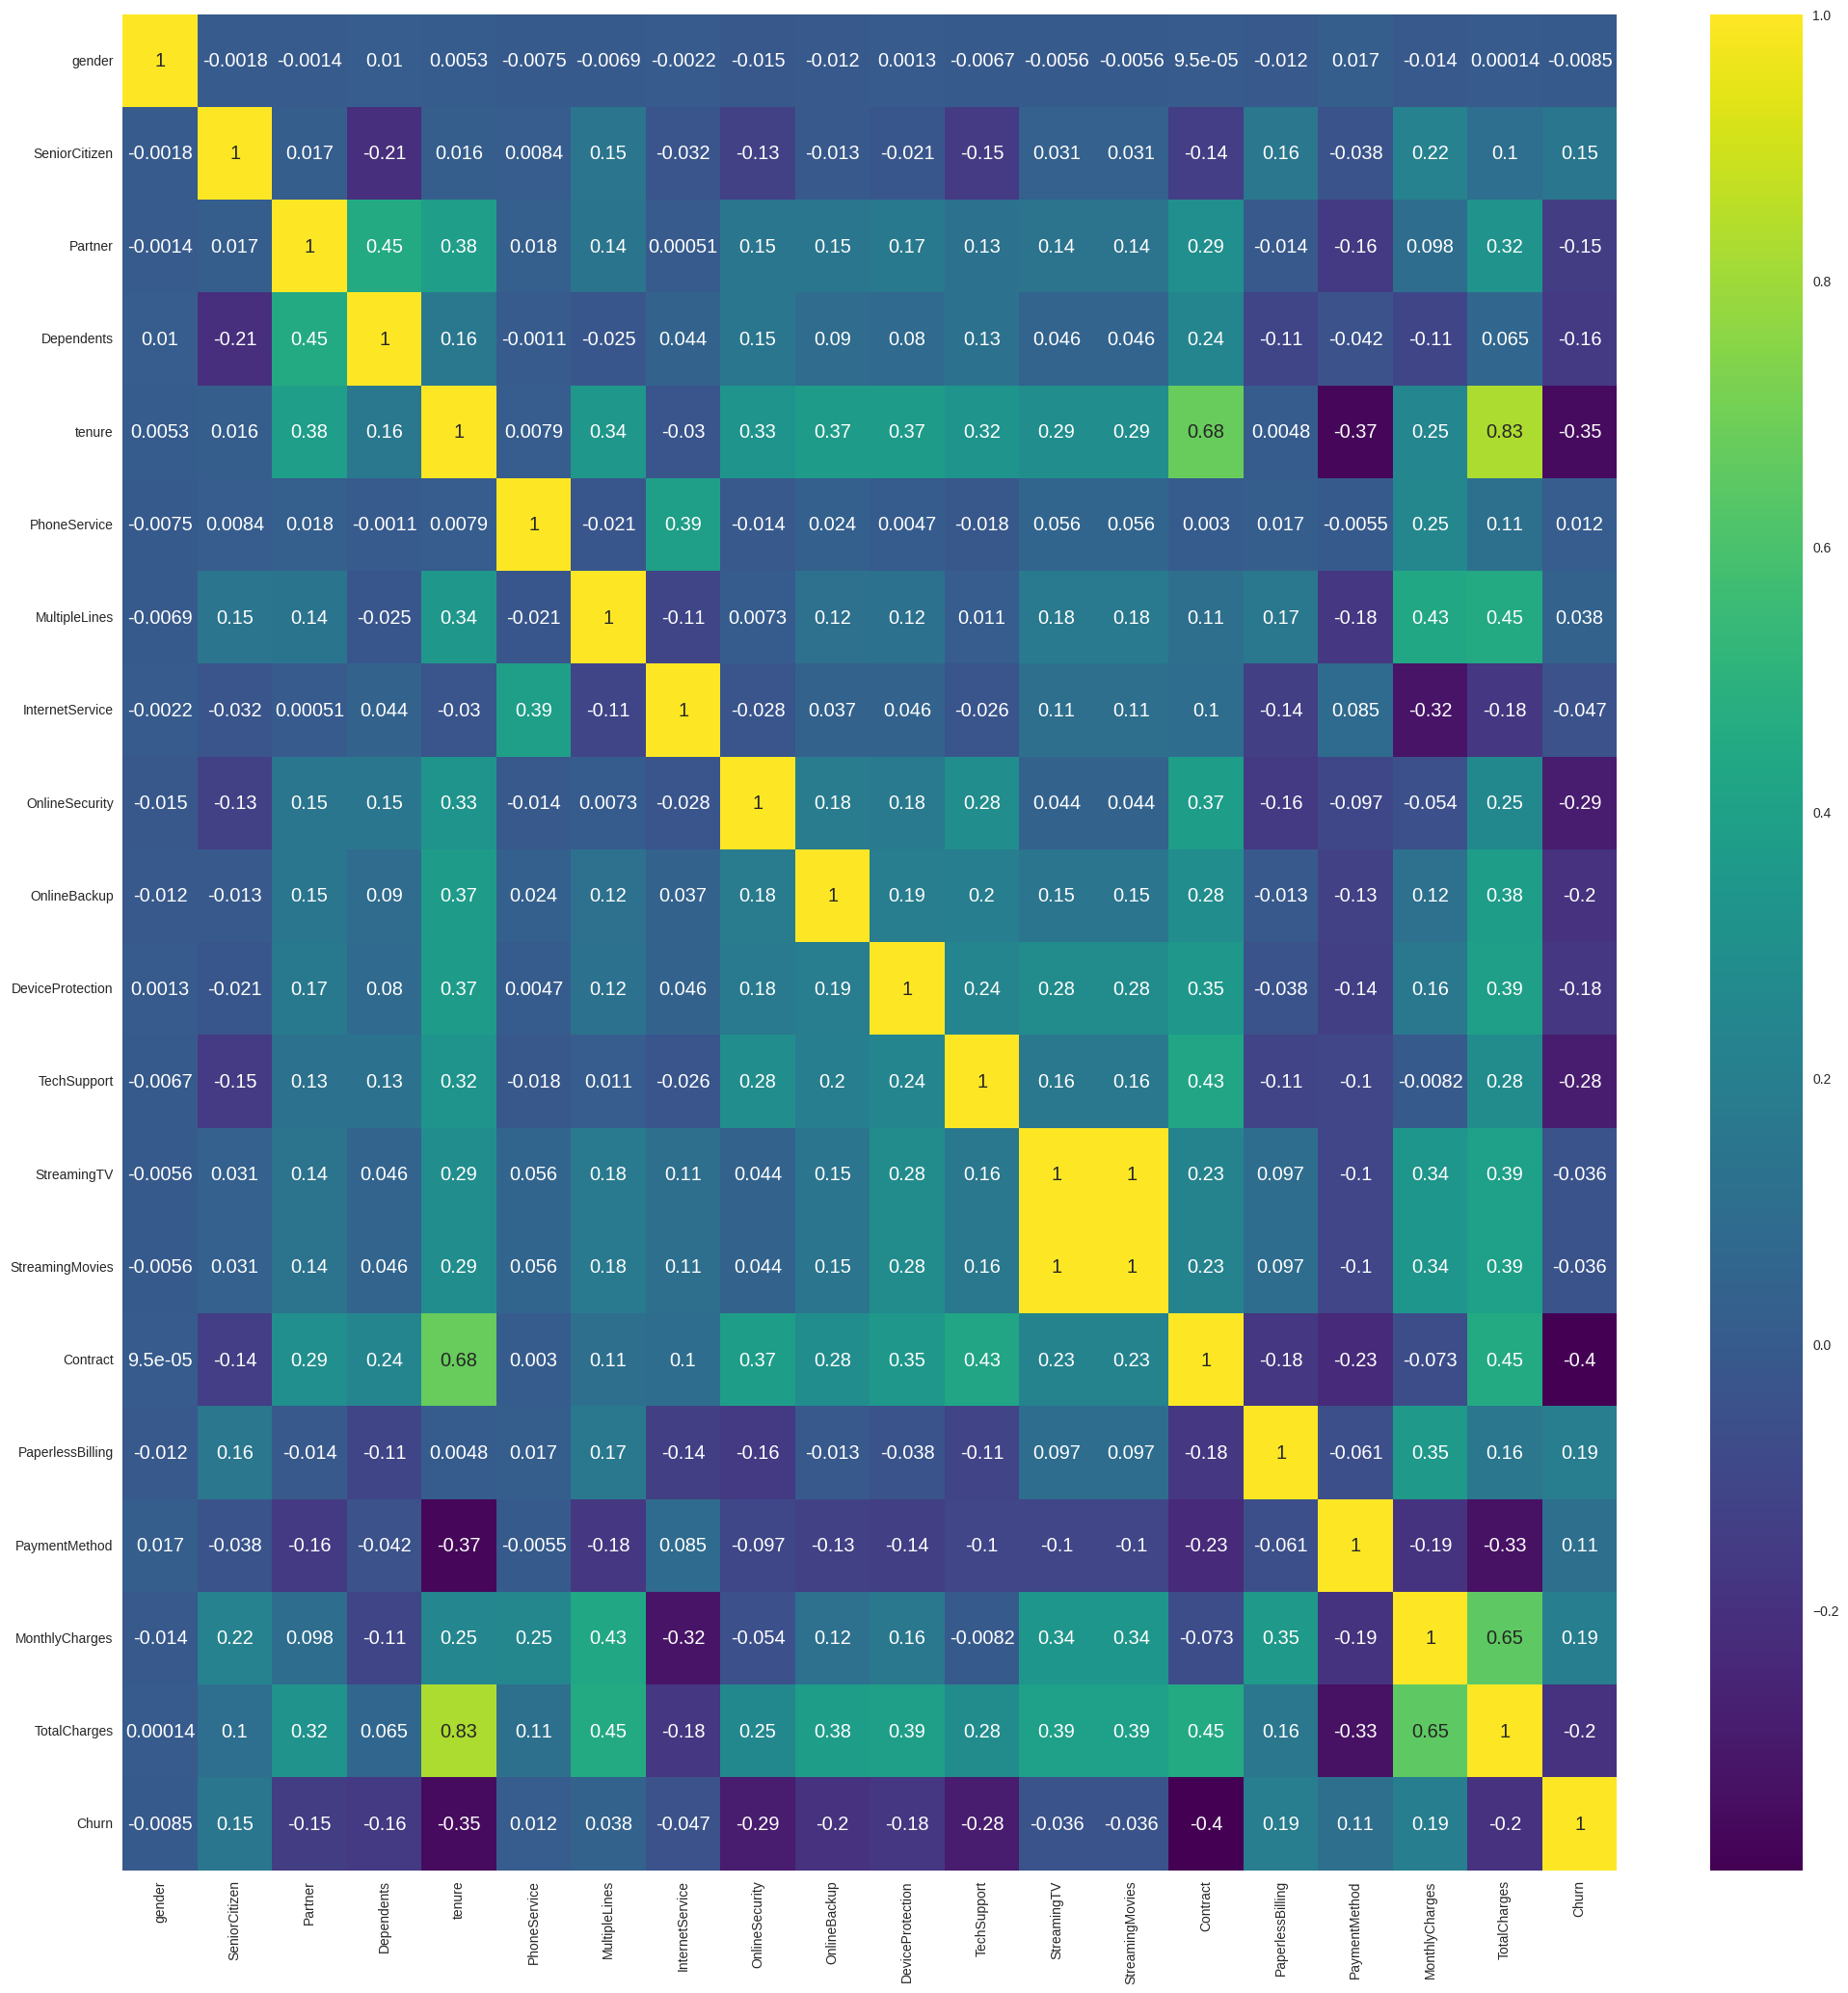

In [323]:

fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='viridis', ax=ax)
plt.show()

**Answer for Q1**: The most correlated attribute is contract followed by tenure


**Q2: Which payment method has the highest churn rate?**

**Visualization**

Text(0.5, 0, 'PaymentMethod')

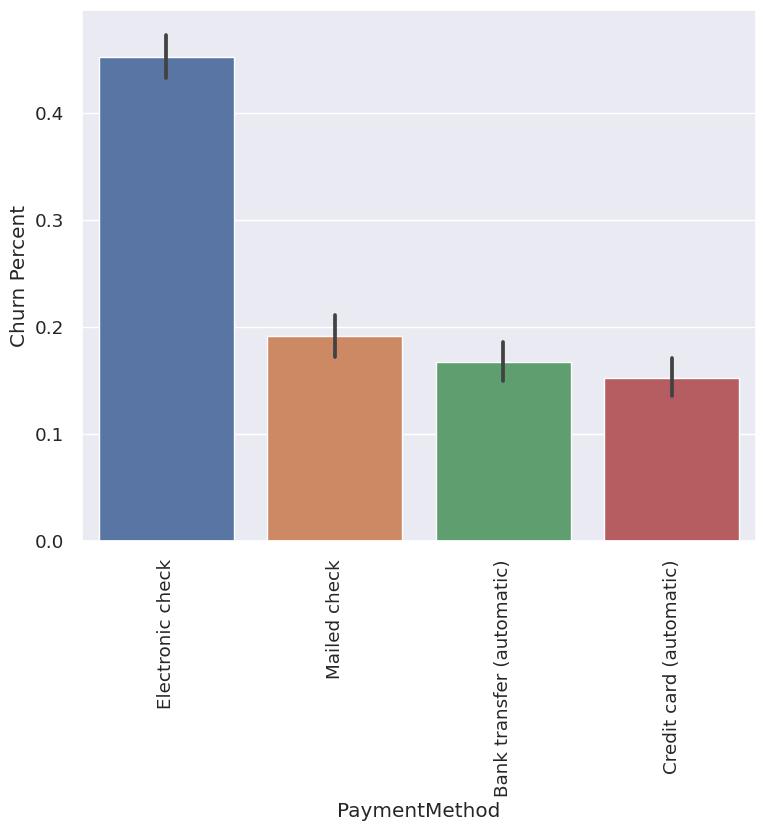

In [344]:
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))
plt.subplot(5, 4, i)
g = sns.barplot(x='PaymentMethod', y='Churn', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn Percent')
plt.xlabel(f'{column}')

**Answer for Q2**: Electronic Check has the highest churn Percent

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

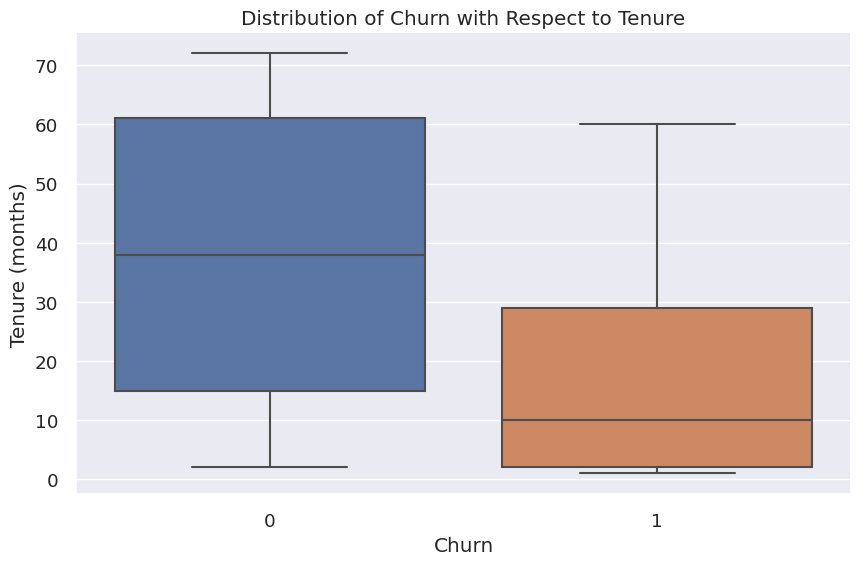

In [345]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Set showfliers to False to exclude outliers and specify the percentiles using whis
sns.boxplot(x='Churn', y='tenure', data=df, showfliers=False, whis=[5, 95])

plt.title('Distribution of Churn with Respect to Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

**Answer for Q3**: Your answer here

## Data Preparation for Modelling

In [327]:
df_encoded = df.copy()

In [328]:
df_encoded['Contract'] = df_encoded['Contract'].cat.codes
df_encoded['Contract'] #scikit-learn does not support categorical data so it much be encoded and switched to numeric

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int8

In [329]:
categorical_features.remove('Contract') #contract is no longer a categorical variable so we remove it from the categorical features list that we did

In [ ]:
categorical_features.remove('Churn')

In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
df_encoded.info() # we are encoding all the binary columns because we need only one value in the node to do the split ,when a value is yes so its definetly not no so one column is enough

In [ ]:
df_encoded.drop(['Partner_No', 'gender_Female','Dependents_No','PhoneService_No','MultipleLines_No','PaperlessBilling_No' ], axis='columns', inplace=True)
df_encoded.columns #when a cvalue is yes it is for sure not no so these are extra columns that we do not need,these are considered redundunt binary columns

## Modelling

In [332]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#data is split into test set and train set because the model has to be tested on data that it has not seen it before in order to be able to calculate the model accurcac

In [333]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [334]:
import graphviz
from sklearn.tree import export_graphviz # we visualize data for more clarity
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph
# alternatively, to export:
# graph.render('Churn')

## Evaluation

In [336]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")  #this function is a helper method that we will call in order to evaluate the model performance

In [337]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False) #the above method is called in order to print out the train test result and the test set result where we provide the model with a data that the model has not seen before tp evaluate accuracy since classification is supervised

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3614.00 1308.00      1.00    4922.00       4922.00
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   6 1302]]

Test Result:
Accuracy Score: 73.03%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.82   0.49      0.73       0.66          0.73
recall       0.81   0.52      0.73       0.66          0.73
f1-score     0.81   0.50      0.73       0.66          0.73
support   1549.00 561.00      0.73    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[1252  297]
 [ 

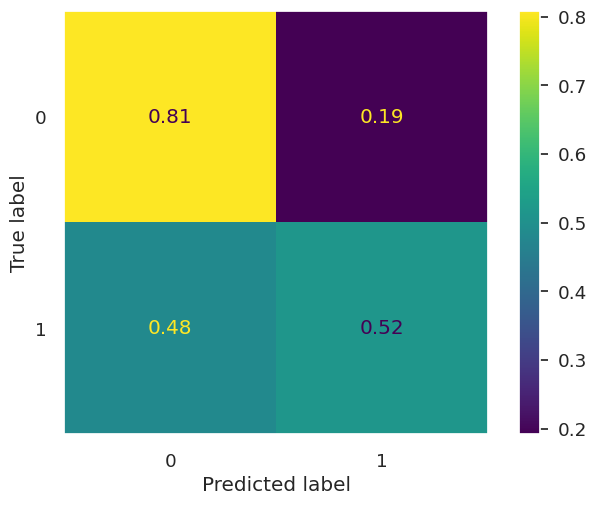

In [338]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true') #For the given confusion matrix in the training set, it reflects a perfect predictive performance with an accuracy of 100%. The model accurately identifies all instances of non-defaulters (class 0) and defaulters (class 1), resulting in 853 true positives and 176 true negatives. As shown, there are no instances misclassified, with a complete absence of false positives or false negatives. This indicates a positive performance on the training set, correlated with a potential risk of overfitting to this specific dataset.
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

In [339]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.4931740614334471
Recall:  0.5151515151515151
F1_score:  0.5039232781168266


## Bonus (Optional)

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lr_model = LogisticRegression( max_iter = 2000 )
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

In [341]:
%timeit lr_model.fit(X_train, y_train)

113 ms ± 45.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [342]:
lr_model.score(X_test, y_test)

0.7962085308056872

In [343]:
%timeit lr_model.score(X_test, y_test)

3.59 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
